<a href="https://colab.research.google.com/github/aditya-account/Colab/blob/main/RainPredictionK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
plt.style.use('dark_background')

#loading the dataset

In [ ]:
df = pd.read_csv("/content/weatherAUS.csv.zip")
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [ ]:
df.shape

(145460, 23)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

# dropping the rows having null values

In [ ]:
df = df.drop(["Evaporation","Sunshine","Cloud9am","Date"],axis=1)
df.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,NaN,16.9,21.8,No,No
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,17.2,24.3,No,No
2,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,2.0,21.0,23.2,No,No
3,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,18.1,26.5,No,No
4,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,8.0,17.8,29.7,No,No


In [ ]:
df = df.dropna(axis=0)
df.shape

(74279, 19)

In [ ]:
df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday',
       'RainTomorrow'],
      dtype='object')

# converting categorical data into numerical data

In [ ]:
from sklearn.preprocessing import LabelEncoder
la = LabelEncoder()
df['WindGustDir'] = la.fit_transform(df['WindGustDir'])
df['WindSpeed9am'] = la.fit_transform(df['WindSpeed9am'])
df['WindSpeed3pm'] = la.fit_transform(df['WindSpeed3pm'])
df['RainToday'] = la.fit_transform(df['RainToday'])
df['RainTomorrow'] = la.fit_transform(df['RainTomorrow'])
df['Location'] = la.fit_transform(df['Location'])
df['WindDir9am'] = la.fit_transform(df['WindDir9am']) 
df['WindDir3pm'] = la.fit_transform(df['WindDir3pm'])
#df['WindDir9am'] = la.fit_transform(df['WindDir9am'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
x = df.drop(['RainTomorrow'], axis=1)
y = df['RainTomorrow']

In [ ]:
x.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud3pm,Temp9am,Temp3pm,RainToday
2,0,12.9,25.7,0.0,15,46.0,13,15,9,13,38.0,30.0,1007.6,1008.7,2.0,21.0,23.2,0
4,0,17.5,32.3,1.0,13,41.0,1,7,3,10,82.0,33.0,1010.8,1006.0,8.0,17.8,29.7,0
11,0,15.9,21.7,2.2,5,31.0,4,1,7,6,89.0,91.0,1010.5,1004.2,8.0,15.9,17.0,1
12,0,15.9,18.6,15.6,13,61.0,6,6,14,14,76.0,93.0,994.3,993.0,8.0,17.4,15.8,1
13,0,12.6,21.0,3.6,12,44.0,13,11,12,10,65.0,43.0,1001.2,1001.8,7.0,15.8,19.8,1


In [ ]:
y.head()

2     0
4     0
11    1
12    1
13    0
Name: RainTomorrow, dtype: int64

#Scatter plot(seaborn)

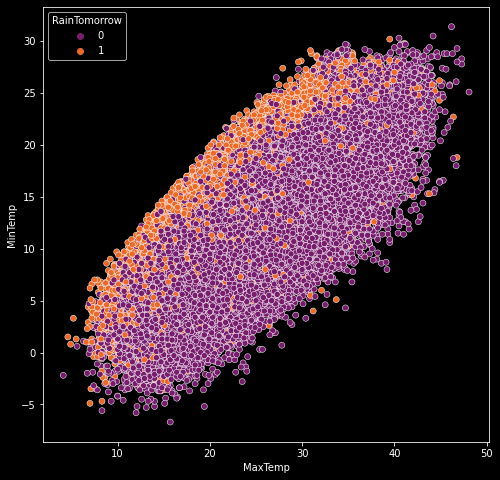

In [ ]:
plt.figure(figsize=(8,8))
sns.scatterplot(x = 'MaxTemp', y = 'MinTemp', hue = 'RainTomorrow', palette = 'inferno', data = df)

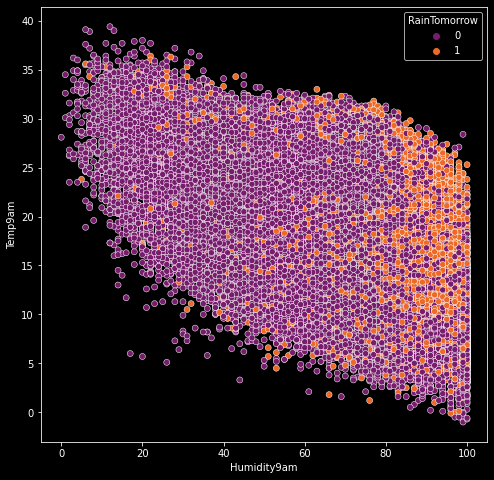

In [ ]:
plt.figure(figsize=(8,8))
sns.scatterplot(x = 'Humidity9am', y = 'Temp9am', hue = 'RainTomorrow', palette = 'inferno', data=df)

#heatmap(seaborn)

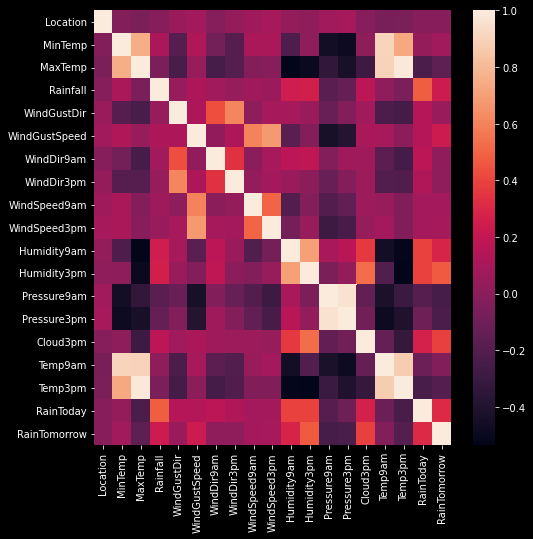

In [ ]:
plt.figure(figsize = (8,8))
sns.heatmap(df.corr())

#splitting the data into test and train

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1) 

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
prediction = lr.predict(x_test)
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))
print(accuracy_score(y_test, prediction))

[[5377  329]
 [ 830  892]]
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      5706
           1       0.73      0.52      0.61      1722

    accuracy                           0.84      7428
   macro avg       0.80      0.73      0.75      7428
weighted avg       0.83      0.84      0.83      7428

0.8439687668282175


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


#Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dc = DecisionTreeClassifier()
dc.fit(x_train, y_train)
prediction = dc.predict(x_test)
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))
print(accuracy_score(y_test, prediction))

[[4865  841]
 [ 753  969]]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      5706
           1       0.54      0.56      0.55      1722

    accuracy                           0.79      7428
   macro avg       0.70      0.71      0.70      7428
weighted avg       0.79      0.79      0.79      7428

0.7854065697361335


#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rc= RandomForestClassifier()
rc.fit(x_train, y_train)
prediction = rc.predict(x_test)
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))
print(accuracy_score(y_test, prediction))

[[5441  265]
 [ 799  923]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      5706
           1       0.78      0.54      0.63      1722

    accuracy                           0.86      7428
   macro avg       0.82      0.74      0.77      7428
weighted avg       0.85      0.86      0.85      7428

0.8567582121701669
